In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate Zomato dataset
restaurant_names = [f"Restaurant_{i}" for i in range(1, 201)]
cities = ["Delhi", "Mumbai", "Bangalore", "Hyderabad", "Chennai", "Kolkata"]
cuisines = ["Indian", "Chinese", "Italian", "Continental", "Mexican", "Thai"]

zomato_data = pd.DataFrame({
    "Restaurant Name": random.choices(restaurant_names, k=200),
    "City": random.choices(cities, k=200),
    "Cuisine Type": random.choices(cuisines, k=200),
    "Average Order Value (AOV)": np.random.randint(100, 1001, size=200),
    "Rating": np.round(np.random.uniform(1.0, 5.0, size=200), 1),
    "Number of Orders": np.random.randint(1, 1001, size=200),
    "Discount Offered (%)": np.random.randint(0, 51, size=200)
})

zomato_data.head()

,Restaurant Name,City,Cuisine Type,Average Order Value (AOV),Rating,Number of Orders,Discount Offered (%)
0,Restaurant_173,Hyderabad,Thai,631,2.0,657,36
1,Restaurant_13,Mumbai,Mexican,869,2.2,54,17
2,Restaurant_9,Delhi,Indian,147,4.9,995,30
3,Restaurant_35,Mumbai,Mexican,259,3.0,724,3
4,Restaurant_41,Kolkata,Italian,699,4.6,963,27


In [4]:

# Descriptive statistics
print("Basic Statistics:\n")
zomato_data.describe()

Basic Statistics:



,Average Order Value (AOV),Rating,Number of Orders,Discount Offered (%)
count,200.000000,200.000000,200.000000,200.000000
mean,545.745000,2.967000,517.380000,23.875000
std,259.693867,1.146641,286.631898,14.819157
min,115.000000,1.000000,12.000000,0.000000
25%,317.750000,2.000000,239.250000,11.000000
50%,556.500000,3.000000,567.000000,22.500000
75%,751.000000,4.000000,733.500000,36.000000
max,998.000000,5.000000,996.000000,50.000000


In [5]:
# Calculate additional descriptive statistics
print("\nAdditional Descriptive Statistics:\n")
percentiles = zomato_data.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
mode_values = zomato_data.mode().iloc[0]
print(f"Mode:\n{mode_values}\n")
percentiles


Additional Descriptive Statistics:

Mode:
Restaurant Name              Restaurant_43
City                             Hyderabad
Cuisine Type                   Continental
Average Order Value (AOV)              137
Rating                                 3.3
Number of Orders                       661
Discount Offered (%)                     3
Name: 0, dtype: object



,Average Order Value (AOV),Rating,Number of Orders,Discount Offered (%)
0.1,175.7,1.40,123.7,4.0
0.2,275.2,1.80,200.2,8.0
0.3,363.4,2.17,315.7,14.0
0.4,468.0,2.66,451.8,19.0
0.5,556.5,3.00,567.0,22.5
0.6,636.0,3.30,642.4,28.0
0.7,717.6,3.80,687.5,33.3
0.8,816.2,4.10,781.4,39.0
0.9,876.4,4.50,918.1,46.0


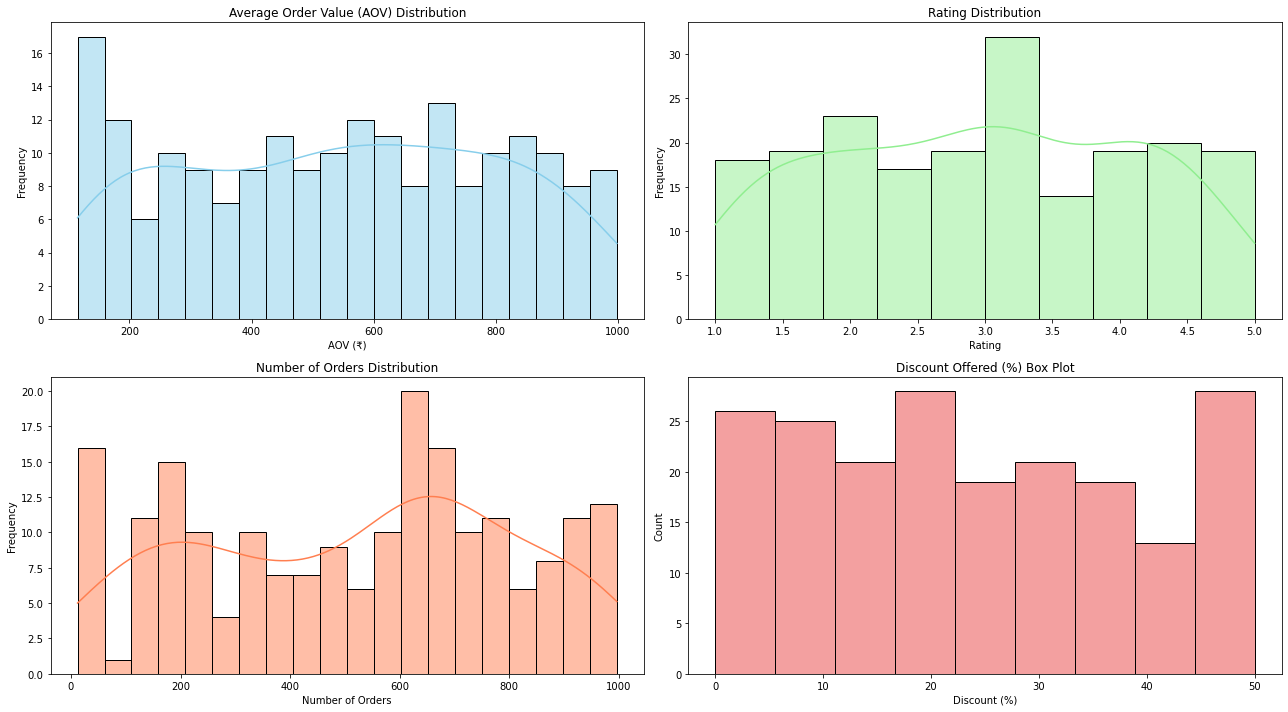

In [6]:

# Plot histograms for numeric columns
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.histplot(zomato_data["Average Order Value (AOV)"], bins=20, kde=True, color='skyblue')
plt.title("Average Order Value (AOV) Distribution")
plt.xlabel("AOV (₹)")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(zomato_data["Rating"], bins=10, kde=True, color='lightgreen')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(zomato_data["Number of Orders"], bins=20, kde=True, color='coral')
plt.title("Number of Orders Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(zomato_data["Discount Offered (%)"], color='lightcoral')
plt.title("Discount Offered (%) Box Plot")
plt.xlabel("Discount (%)")

plt.tight_layout()
plt.show()


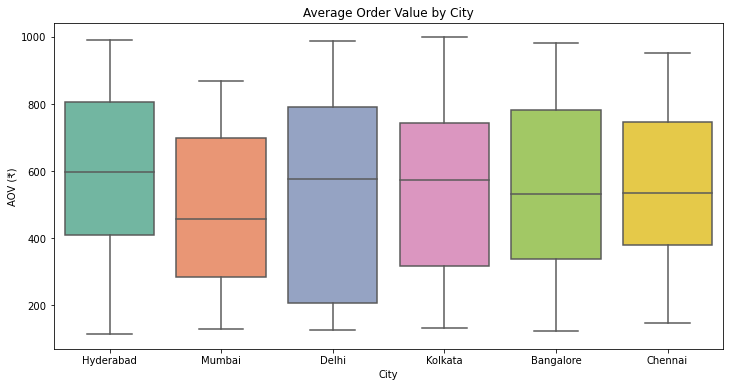

In [7]:
# Additional Charts and Analysis
# Box Plot for Average Order Value by City
plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="Average Order Value (AOV)", data=zomato_data, palette="Set2")
plt.title("Average Order Value by City")
plt.xlabel("City")
plt.ylabel("AOV (₹)")
plt.show()


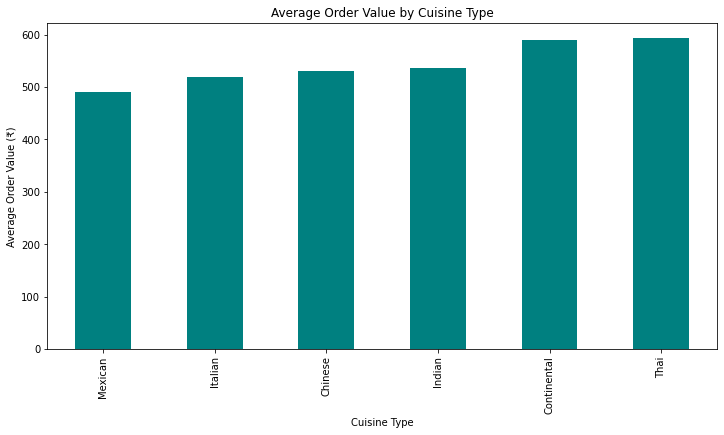

In [8]:

# Bar Plot for Average AOV by Cuisine Type
avg_aov_by_cuisine = zomato_data.groupby("Cuisine Type")["Average Order Value (AOV)"].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_aov_by_cuisine.plot(kind='bar', color='teal')
plt.title("Average Order Value by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Order Value (₹)")
plt.show()


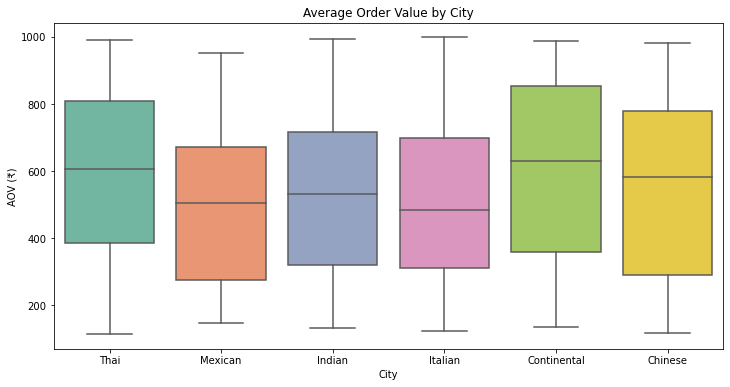

In [9]:
# Box Plot for Average Order Value by City
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cuisine Type", y="Average Order Value (AOV)", data=zomato_data, palette="Set2")
plt.title("Average Order Value by City")
plt.xlabel("City")
plt.ylabel("AOV (₹)")
plt.show()

In [10]:

# City-Level Analysis
city_analysis = zomato_data.groupby("City").agg({
    "Average Order Value (AOV)": ["mean", "max", "min"],
    "Rating": ["mean"],
    "Number of Orders": ["mean", "sum"],
    "Discount Offered (%)": ["mean"]
})
print("\nCity-Level Analysis:\n")
city_analysis



City-Level Analysis:



Average Order Value (AOV)              Rating Number of Orders  \
                               mean  max  min      mean             mean   
City                                                                       
Bangalore                547.156250  981  124  2.712500       544.156250   
Chennai                  565.285714  951  148  2.982143       458.214286   
Delhi                    523.655172  988  128  3.006897       511.068966   
Hyderabad                580.024390  991  115  2.926829       580.414634   
Kolkata                  557.513514  998  134  3.302703       517.027027   
Mumbai                   491.424242  869  129  2.839394       469.242424   

                 Discount Offered (%)  
             sum                 mean  
City                                   
Bangalore  17413            22.562500  
Chennai    12830            24.964286  
Delhi      14821            25.448276  
Hyderabad  23797            21.195122  
Kolkata    19130            25.270270  
Mumbai     15485            24.606061

In [11]:

# Cuisine-Level Analysis
cuisine_analysis = zomato_data.groupby("Cuisine Type").agg({
    "Average Order Value (AOV)": ["mean", "max", "min"],
    "Rating": ["mean"],
    "Number of Orders": ["mean", "sum"],
    "Discount Offered (%)": ["mean"]
})
print("\nCuisine-Level Analysis:\n")
cuisine_analysis



Cuisine-Level Analysis:



Average Order Value (AOV)              Rating Number of Orders  \
                                  mean  max  min      mean             mean   
Cuisine Type                                                                  
Chinese                     531.088235  981  117  3.023529       561.411765   
Continental                 589.461538  988  137  3.025641       472.333333   
Indian                      536.521739  993  134  3.134783       496.695652   
Italian                     518.891892  998  124  2.848649       581.027027   
Mexican                     491.193548  951  149  3.025806       501.096774   
Thai                        592.694444  991  115  2.813889       486.416667   

                    Discount Offered (%)  
                sum                 mean  
Cuisine Type                              
Chinese       19088            25.470588  
Continental   18421            22.743590  
Indian        11424            25.043478  
Italian       21498            26.945946  
Mexican       15534            19.129032  
Thai          17511            23.777778

In [12]:

# Combination Analysis (City + Cuisine)
city_cuisine_analysis = zomato_data.groupby(["City", "Cuisine Type"]).agg({
    "Average Order Value (AOV)": "mean",
    "Rating": "mean",
    "Number of Orders": "sum"
}).reset_index()
print("\nCity and Cuisine Combination Analysis:\n")
city_cuisine_analysis




City and Cuisine Combination Analysis:



,City,Cuisine Type,Average Order Value (AOV),Rating,Number of Orders
0,Bangalore,Chinese,651.166667,2.483333,3313
1,Bangalore,Continental,579.166667,3.133333,2734
2,Bangalore,Indian,388.666667,3.100000,2335
3,Bangalore,Italian,442.444444,2.744444,3686
4,Bangalore,Mexican,536.000000,3.700000,1669
5,Bangalore,Thai,651.166667,1.950000,3676
6,Chennai,Chinese,635.333333,3.000000,1824
7,Chennai,Continental,540.428571,3.057143,2763
8,Chennai,Indian,704.333333,3.066667,1041
9,Chennai,Italian,518.857143,3.357143,3675


In [14]:
city_cuisine_analysis = city_cuisine_analysis.sort_values(by=['Average Order Value (AOV)'], ascending=False)
city_cuisine_analysis.head()

,City,Cuisine Type,Average Order Value (AOV),Rating,Number of Orders
19,Hyderabad,Continental,921.000000,3.500000,3226
21,Hyderabad,Italian,747.600000,2.640000,3609
8,Chennai,Indian,704.333333,3.066667,1041
17,Delhi,Thai,699.500000,3.050000,1272
0,Bangalore,Chinese,651.166667,2.483333,3313
